<a href="https://colab.research.google.com/github/krishchat/Personal-Loan-Predictor/blob/main/Personal_Loan_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  AllLife Bank Personal Loan Predictor


-----------------------------------------------------------------------

### Background and Context


AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of <b>converting its liability customers to personal loan customers</b>
(while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers <b>who have a higher probability of purchasing the loan</b>.

### Objective

* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more.

### Data Dictionary


* $ID$: Customer ID

* $Age$: Customer’s age in completed years

* $Experience$: #years of professional experience

* $Income$: Annual income of the customer (in thousand dollars)

* $ZIP Code$: Home Address ZIP code.

* $Family$: the Family size of the customer

* $CCAvg$: Average spending on credit cards per month (in thousand dollars)

* $Education$: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

* $Mortgage$: Value of house mortgage if any. (in thousand dollars)

* $Personal Loan$: Did this customer accept the personal loan offered in the last campaign?

* $Securities Account$: Does the customer have securities account with the bank?

* $CD Account$: Does the customer have a certificate of deposit (CD) account with the bank?

* $Online$: Do customers use internet banking facilities?

* $CreditCard$: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?













### Importing all required Libraries:

In [ ]:
# For reading and manipulating data
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To display the plot here
%matplotlib inline

# to restrict the float value to 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# to show all columns in the dataset
pd.set_option("display.max_columns", None)


# to perform scaling of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build Logistic Regression model
from sklearn.linear_model import LogisticRegression

# to build decision tree classifier model
from sklearn.tree import DecisionTreeClassifier

# to check model performance
from sklearn import metrics

# model metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# importing Tree to Plot Decision Tree
from sklearn import tree

# importing gridsearchcv to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading and exploring the data


- Loading csv data into a pandas dataframe.

- Creating and saving a copy (deep copy) of the dataframe.

- Checking Datatype of columns.

- Look for Columns with Missing Data.

- Check duplicate records.

#### Loading csv data into a pandas dataframe.

In [ ]:
df = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

#### Saving a copy (deep copy) of the dataframe

In [ ]:
df_bkup = df.copy()  # Backing Up my dataframe

<IPython.core.display.Javascript object>

#### Checkout a sample of the dataframe loaded from csv

In [ ]:
np.random.seed(1)
df.sample(n=10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.90,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.90,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.30,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.30,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.60,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.50,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.60,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.20,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.80,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.00,3,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Shape of dataframe

In [ ]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe")

There are 5000 rows and 14 columns in the dataframe


<IPython.core.display.Javascript object>

#### Checking Datatype of each columns of my dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

####  Missing Data check

In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

#### Duplicate rows check

In [ ]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

##### Datatype of all columns alright - Yes  
   
  - Have to check $ZipCode$ column. It's numeric but lets see if we can make it categorical to bring more value

##### Missing Data in any column -- No


##### Duplicate record present -- No

## Data Processing & Feature Engineering

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Removing ID Column as it's not adding any value

In [ ]:
df.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [ ]:
# Lets see how many different ZipCodes are there

df["ZIPCode"].nunique()

467

<IPython.core.display.Javascript object>

#### Analyzing ZIPCode data

* Importing python library uszipcode
* Researching how we can best use it
* Can we add categorical columns of City and State instead of Zipxcodes to draw a better picture

In [ ]:
! pip install uszipcode #Installing python package uszipcode

ERROR: Invalid requirement: '#Installing'


<IPython.core.display.Javascript object>

#### From ZIPCodes, we can find City, County and State like below

In [ ]:
from uszipcode import SearchEngine

sr = SearchEngine()
z = sr.by_zipcode("91107")
print(z.major_city)
print(z.county)
print(z.state)

Pasadena
Los Angeles County
CA


<IPython.core.display.Javascript object>

#### Creating a function to add 3 new columns to the datafram 

- $City$
- $County$
- $State$

In [ ]:
# Function to get City from Zip

def get_city(zip):
    zip_search = SearchEngine()
    zip_det = zip_search.by_zipcode(str(zip))

    if zip_det is None:
        city = "Unknown"
    else:
        city = zip_det.major_city

    return city



# Function to get County from Zip

def get_county(zip):
    zip_search = SearchEngine()
    zip_det = zip_search.by_zipcode(str(zip))

    if zip_det is None:
        county = "Unknown"
    else:
        county = zip_det.county

    return county



# Function to get State from Zip

def get_state(zip):
    zip_search = SearchEngine()
    zip_det = zip_search.by_zipcode(str(zip))

    if zip_det is None:
       state = "Unknown"
    else:
        state = zip_det.state

    return state


<IPython.core.display.Javascript object>

#### Creating 3 new columns City, County and State from ZIPCode

In [ ]:
df["City"] = df["ZIPCode"].apply(get_city)

df["County"] = df["ZIPCode"].apply(get_county)

df["State"] = df["ZIPCode"].apply(get_state)

<IPython.core.display.Javascript object>

#### Some records might have $Invalid$ ZipCodes. Lets check

In [ ]:
# Zipcodes for which no data is found, city, county and state are marked Unknown.

df.loc[df["City"] == "Unknown"]["ZIPCode"].unique()

array([92717, 93077, 92634, 96651], dtype=int64)

<IPython.core.display.Javascript object>

In [ ]:
df.loc[df["City"] == "Unknown"].shape[0]

34

<IPython.core.display.Javascript object>

#### There are 4 Zipcodes consisting 34 records that have invalid zipcodes.

* 92717
* 93077
* 92634
* 96651

#### I looked up these Zip codes in USPS website, but all of these returned invalid. We will analyze more and if these 34 records turns out to be useless, we may delete these 34 records. <i> Not deleting anything now </i>

#### Deleting ZIPCode column as it is no longer required

In [ ]:
df.drop("ZIPCode", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,County,State
0,25,1,49,4,1.60,1,0,0,1,0,0,0,Pasadena,Los Angeles County,CA
1,45,19,34,3,1.50,1,0,0,1,0,0,0,Los Angeles,Los Angeles County,CA
2,39,15,11,1,1.00,1,0,0,0,0,0,0,Berkeley,Alameda County,CA
3,35,9,100,1,2.70,2,0,0,0,0,0,0,San Francisco,San Francisco County,CA
4,35,8,45,4,1.00,2,0,0,0,0,0,1,Northridge,Los Angeles County,CA


<IPython.core.display.Javascript object>

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal_Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00
Securities_Account,5000.00,0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD_Account,5000.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00


<IPython.core.display.Javascript object>

* Minimum $Experience$ is -3. Have to check.
* Check distinct values in $Family$. Have to check we have valid integer values.
* Check $Education Level$ distinct values. Have to be 1,2 or 3.
* Check values in $Personal Loan$ column.
* $SecuritiesAccount$, $CDAccount$,$Online$ and $CreditCard$ must have 0 or 1 values. Check 

#### Check Experience Values

In [ ]:
df.loc[df["Experience"] < 0].shape

(52, 15)

<IPython.core.display.Javascript object>

##### Analyzing Experience and Age

<AxesSubplot:xlabel='Age', ylabel='Experience'>

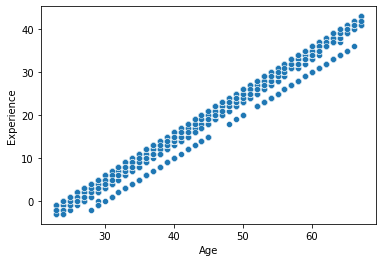

<IPython.core.display.Javascript object>

In [ ]:
sns.scatterplot(data=df, x="Age", y="Experience")

* 52 records are there where Experience is Negative.


* Since Experience and Age are very highly correlated, we will impute negative Exp with Mode of Age.


* Imputing these Negative Experience values by taking mode() of Experience from corresponding Age values.


#### Computing the value of Experience corresponding to the Age for other records in the dataframe

In [ ]:
# Converting all Negative Experience values to NaN to use fillNa later

df.loc[df["Experience"] < 0, "Experience"] = np.nan


# Creating a dictionary age_exp that will contain a mapping of Age and Mode() of Experience in that Age

age_exp = {}
for age in list(df[df["Experience"].isna()]["Age"].unique()):
    try:
        exp_mode = df[df["Age"] == age]["Experience"].mode()[0]
    except:
        exp_mode = 0.0

    age_exp[age] = exp_mode


# Creating a Function that will return Experience from Age using above dictionary


def get_exp_from_age(age):
    return age_exp.get(age)

<IPython.core.display.Javascript object>

#### Updating Experience Column of the DataFrame using fillna and apply

In [ ]:
df["Experience"].fillna(df["Age"].apply(get_exp_from_age), inplace=True)

<IPython.core.display.Javascript object>

* There are 52 records where Experience is negative which is not possible. Hence imputing them to 0 years of experience.

#### Check Distinct values in Family column

In [ ]:
list(df["Family"].unique())

[4, 3, 1, 2]

<IPython.core.display.Javascript object>

#### Check Distinct values in Education column

In [ ]:
list(df["Education"].unique())

[1, 2, 3]

<IPython.core.display.Javascript object>

#### Check Binary / Multinary Column values

In [ ]:
# Creating a list of columns that have numeric data but actually Categorical

binary_cols = [
    "Personal_Loan",
    "Family",
    "Education",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]

# Printing the distinct values below

for cols in binary_cols:
    print(f"Distinct values in {cols} are ----> {df[cols].unique()}")

Distinct values in Personal_Loan are ----> [0 1]
Distinct values in Family are ----> [4 3 1 2]
Distinct values in Education are ----> [1 2 3]
Distinct values in Securities_Account are ----> [1 0]
Distinct values in CD_Account are ----> [0 1]
Distinct values in Online are ----> [0 1]
Distinct values in CreditCard are ----> [0 1]


<IPython.core.display.Javascript object>

#### Since above columns actually contains fixed categories, hence converting them to Categorical 

In [ ]:
# Using above List converting them to Category

for object_cols in binary_cols:
    df[object_cols] = df[object_cols].astype("category")

<IPython.core.display.Javascript object>

### Conclusion from Data Processing

* No missing values now.

* No duplicated records now.

* All columns contained correct possible data.

* Datatype of all columns are corrected. Following columns are changed to categorical.

        - Family
        
        - Education
    
        - Securities_Account
    
        - CD_Account
    
        - Online
    
        - CreditCard
        
* Added 3 new columns 
        - City
        
        - County
        
        - State
        
* Removed ZipCode column


## Univariate Analysis 

#### Plotting histograms to view data distribution of numerical columns

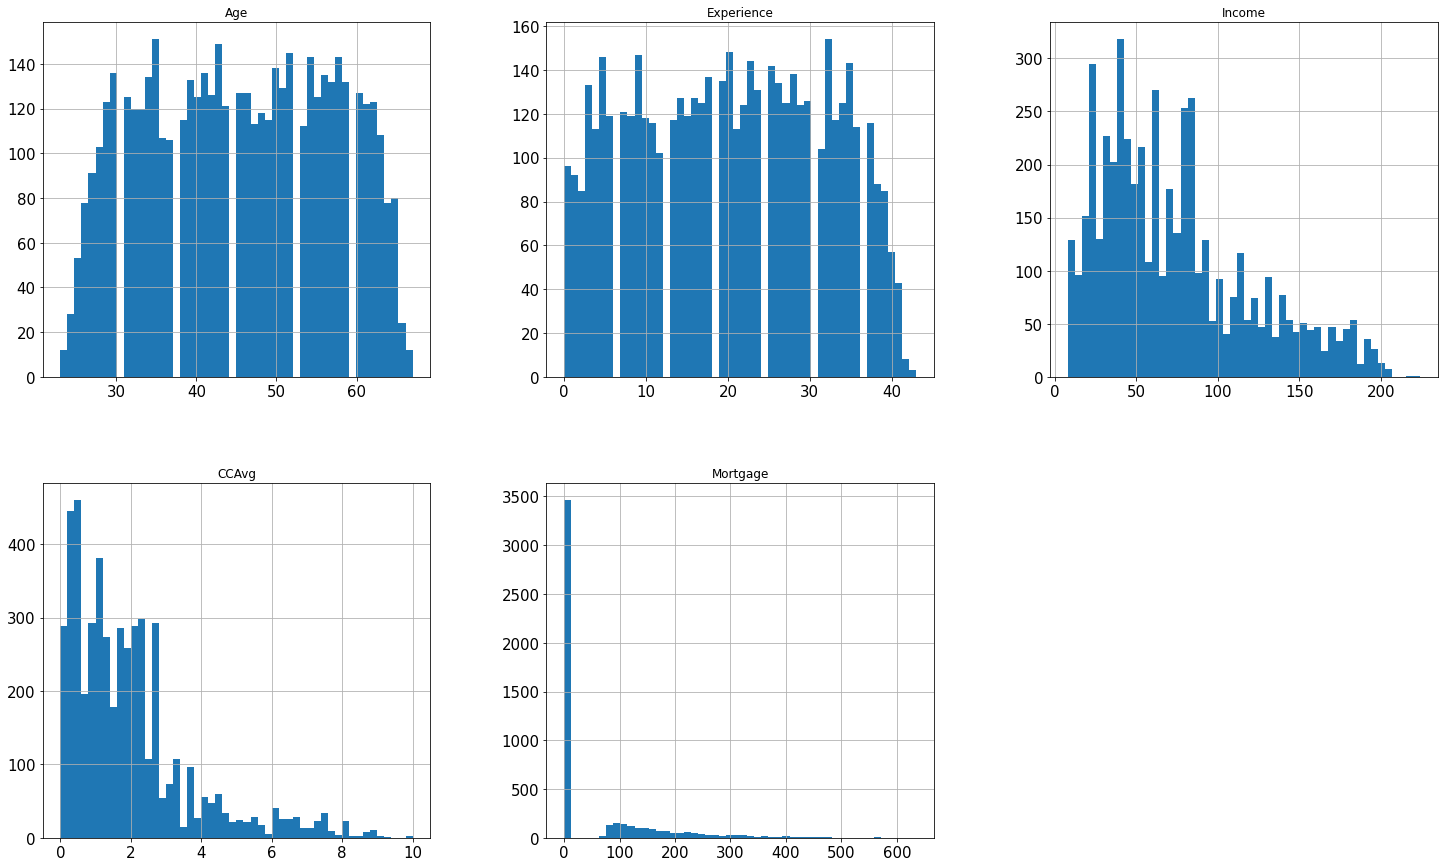

<IPython.core.display.Javascript object>

In [ ]:
numeric_cols = [cols for cols in (df.select_dtypes(include=np.number).columns) if cols != 'Personal_Loan' ]

df[numeric_cols].hist(figsize=(25,15), layout= (2,3), bins=50,xlabelsize=15,ylabelsize=15);


#### Data distribution in Numerical Columns


- <b>Age</b> and <b>Experience</b> almost follows a Normal Distribution data.

- <b>Income</b>, <b>CCAvg</b> and <b>Mortgage</b> are right skewed.

#### Finding Outliers

In [ ]:
# Following function will find Outliers in the data


def find_outliers(col):
    Q1 = np.quantile(col, 0.25)
    Q3 = np.quantile(col, 0.75)
    outliers = []
    IQR = Q3 - Q1

    lower_whisker = Q1 - IQR * 1.5
    upper_whisker = Q3 + IQR * 1.5

    for data in col:
        if (data < lower_whisker) | (data > upper_whisker):
            outliers.append(data)

    return outliers

<IPython.core.display.Javascript object>

There are 1.92% Outliers in Income
There are 6.48% Outliers in CCAvg
There are 5.82% Outliers in Mortgage


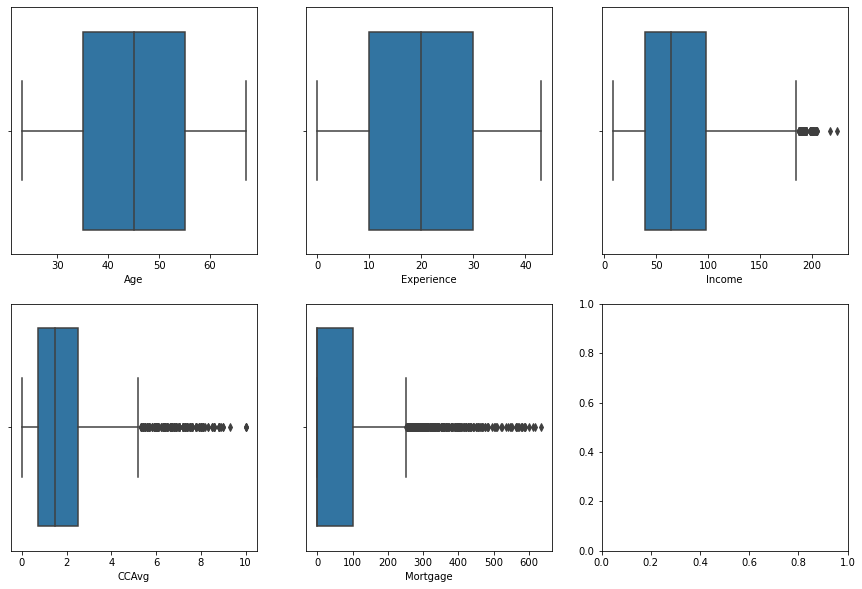

<IPython.core.display.Javascript object>

In [ ]:
# Looping thru all numeric_cols lists and checking outliers

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
i = 0
for cols in numeric_cols:
    outliers = find_outliers(df[cols])

    if len(outliers) > 0:
        percent_outliers = (len(outliers) * 100) / 5000
        print(f"There are {round(percent_outliers, 2)}% Outliers in {cols}")

    # Plotting all Boxplots together

    row = i // 3
    col = i % 3
    plt_ax = axes[row, col]

    sns.boxplot(data=df, x=cols, ax=plt_ax)
    i += 1

#### Check the outlier records and find out if they are <b><u>Actually</u></b> Outliers or Not

In [ ]:
# Income Outliers

income_outliers = find_outliers(df["Income"])

df_income_outs = df[df["Income"].isin(income_outliers)]


# CCAvg Outliers

income_outliers = find_outliers(df["CCAvg"])

df_CCAvg_outs = df[df["CCAvg"].isin(income_outliers)]


# Mortgage Outliers

income_outliers = find_outliers(df["Mortgage"])

df_Mortgage_outs = df[df["Mortgage"].isin(income_outliers)]

<IPython.core.display.Javascript object>

In [ ]:
df_income_outs.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,96.00,42.85,10.58,26.00,34.00,45.00,51.00,65.00
Experience,96.00,17.78,10.58,0.00,9.00,20.00,26.00,41.00
Income,96.00,194.67,6.06,188.00,191.00,193.50,198.00,224.00
CCAvg,96.00,5.00,2.57,0.00,2.98,4.75,6.67,10.00
Mortgage,96.00,132.30,198.44,0.00,0.00,0.00,238.50,635.00


<IPython.core.display.Javascript object>

* Max of 224k salary is a valid data. It is just some people are highly paid which we should consider and keep in data

<AxesSubplot:xlabel='CCAvg', ylabel='Income'>

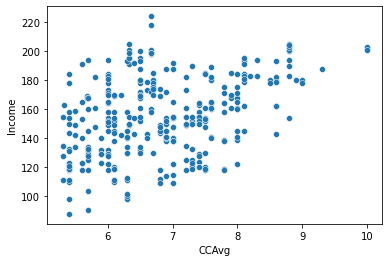

<IPython.core.display.Javascript object>

In [ ]:
df_CCAvg_outs.sort_values(by="CCAvg", ascending=False)

sns.scatterplot(data=df_CCAvg_outs, y="Income", x="CCAvg")

- Some people spends more (way more) than others. But it's not like an impossible data.

- A scatter plot shows that people with high salary have higher credit card expenditure.

- Hence keeping these "outliers" too

<AxesSubplot:xlabel='Mortgage', ylabel='Income'>

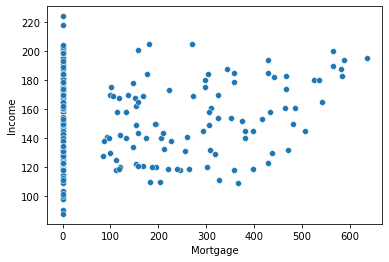

<IPython.core.display.Javascript object>

In [ ]:
df_Mortgage_outs.describe().T

sns.scatterplot(data=df_CCAvg_outs, y="Income", x="Mortgage")

In [ ]:
# Some mortgages are high - Checking the location.

df_Mortgage_outs.loc[df_Mortgage_outs["Mortgage"] >= 500]["County"].value_counts().loc[
    lambda x: x > 0
]

Los Angeles County       5
Santa Clara County       4
San Mateo County         3
Monterey County          2
San Diego County         2
Alameda County           2
Yolo County              1
Sonoma County            1
Ventura County           1
San Bernardino County    1
San Francisco County     1
Santa Cruz County        1
Sacramento County        1
Mendocino County         1
Name: County, dtype: int64

<IPython.core.display.Javascript object>

* Some people has purchased bigger houses or due to the location the prices are too high compared to others.
* We should <u>not</u> consider these records as Outliers.

#### Outliers:


* There are 1.92% Outliers in Income

* There are 6.48% Outliers in CCAvg

* There are 5.82% Outliers in Mortgage

* Max of 224k salary is a valid data. It is just some people are highly paid which we should consider and keep in data

* Some people spends more (way more) than others. But it's not like an impossible data hence keeping these "outliers" too.

* Some people has purchased bigger houses or due to the location, prices are too high compared to others.Hence keeping Outliers too.

### Lets analyze the Categorical data



In [ ]:
# A Function to add percentage % to the Count plots
def perc_cal(plot, feature):
    total = len(feature)  # column length
    for p in plot.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / total)  # class %
        x = p.get_x() + p.get_width() / 2 - 0.05  # width
        y = p.get_y() + p.get_height()  # hieght
        plot.annotate(percentage, (x, y), size=15)  # annotate %

<IPython.core.display.Javascript object>

In [ ]:
df.select_dtypes(include="category").columns

Index(['Family', 'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

<IPython.core.display.Javascript object>

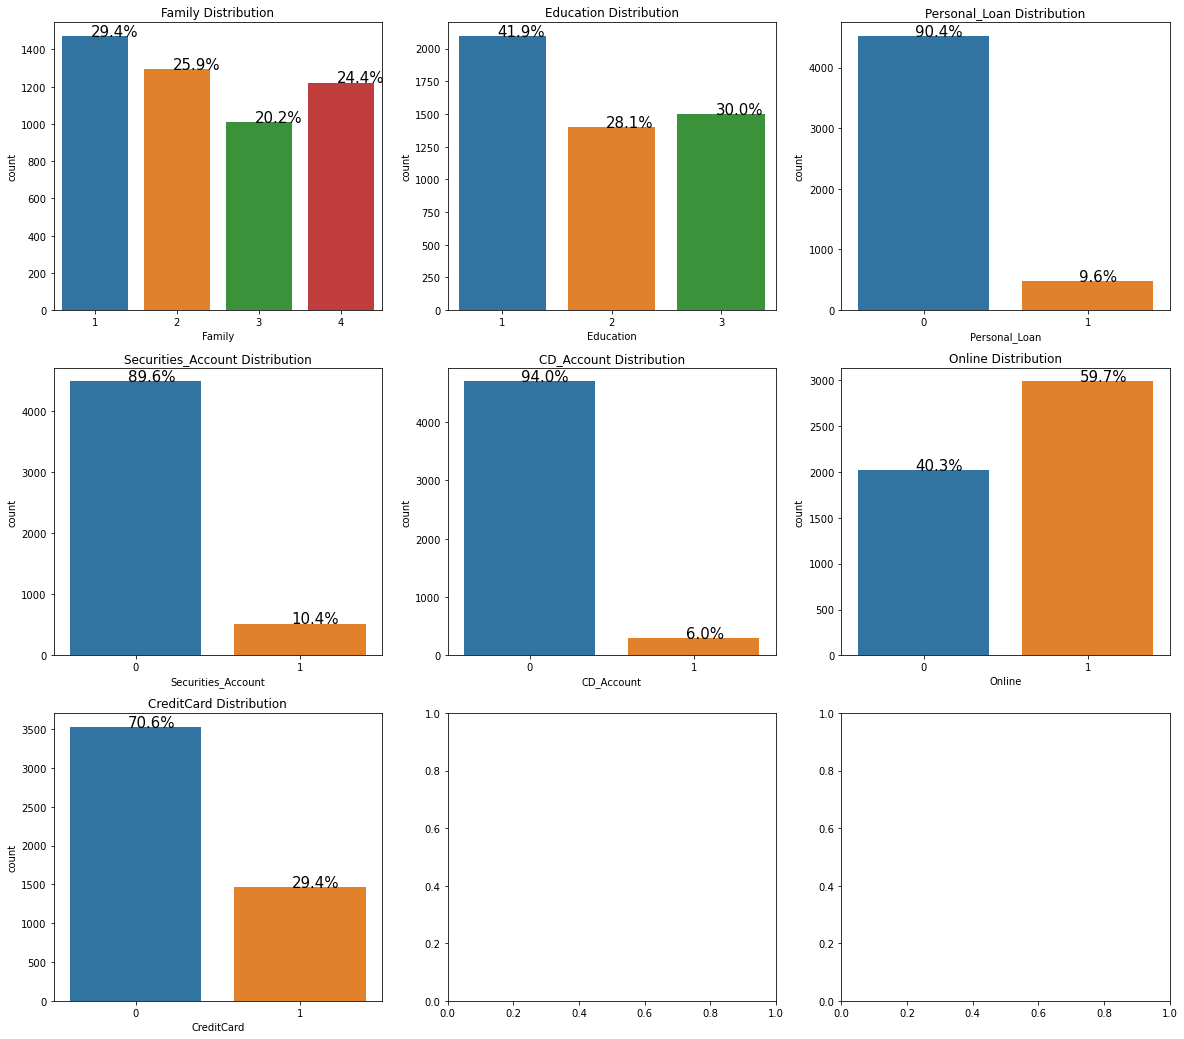

<IPython.core.display.Javascript object>

In [ ]:
# Loop thru the Categorical columns and Plotting them together

fig, axes = plt.subplots(3, 3, figsize=(20, 18))

cat_f = list(df.select_dtypes(include="category").columns)

for i in range(len(cat_f)):
    row = i // 3
    col = i % 3
    plt_ax = axes[row, col]

    sns.countplot(data=df, x=cat_f[i], ax=plt_ax).set(title=cat_f[i] + " Distribution")
    perc_cal(plt_ax, df[cat_f[i]])


plt.show()

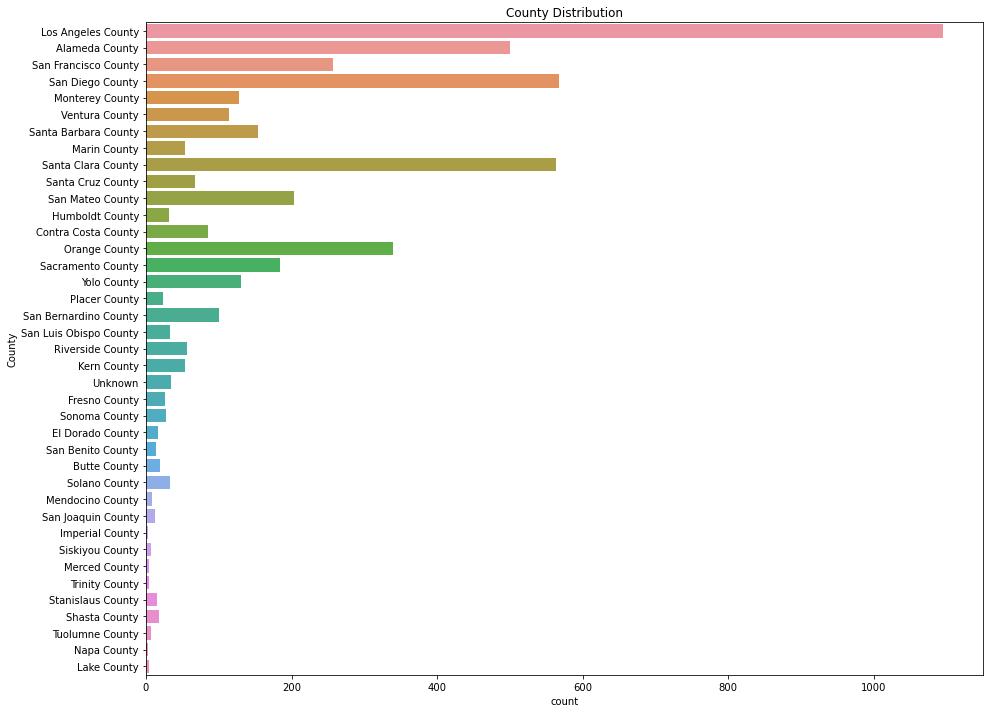

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 12))
sns.countplot(data=df, y="County").set(title="County Distribution")
plt.show()

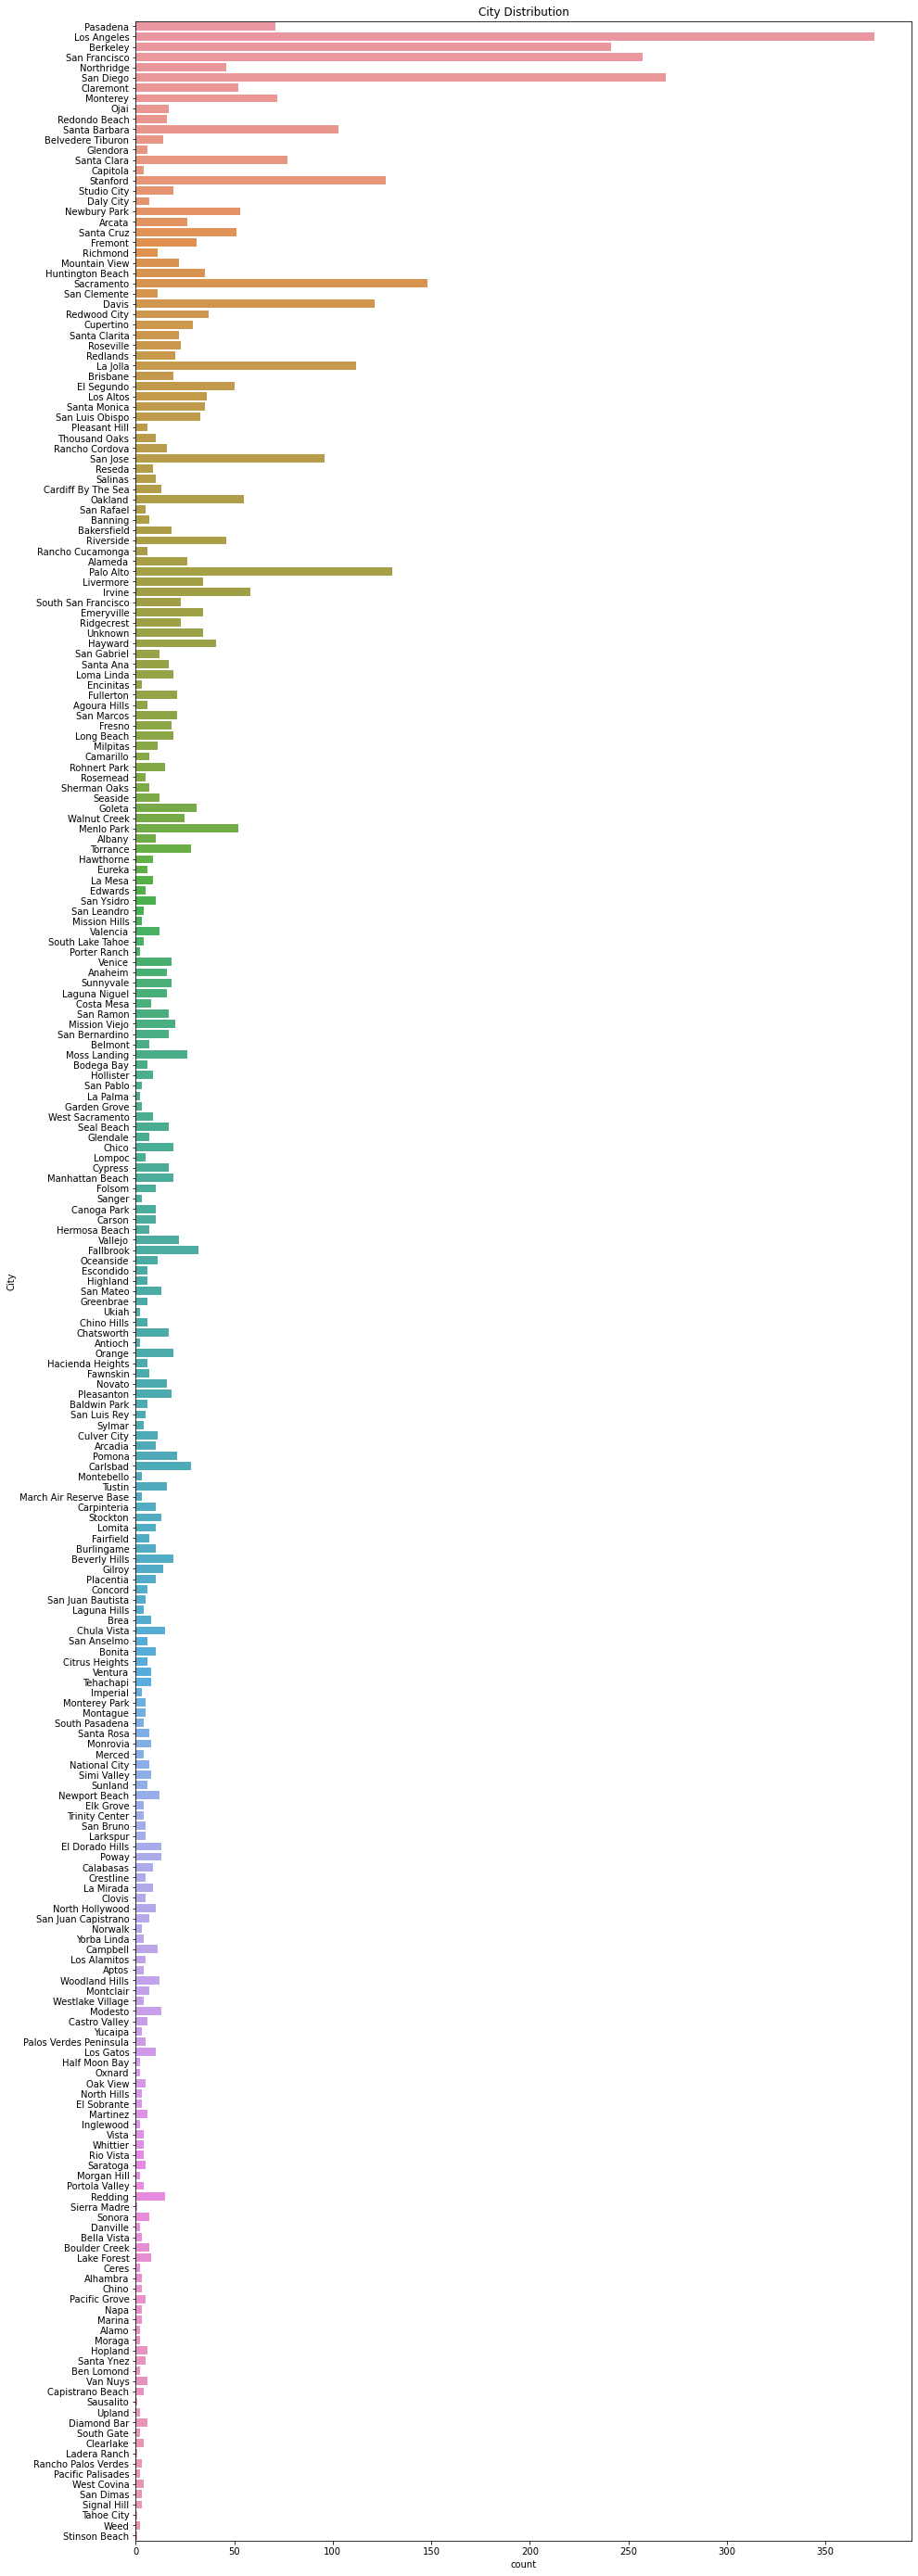

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 50))
sns.countplot(data=df, y="City").set(title="City Distribution")
plt.show()

#### Distribution of Categorical data


* <b>Family size</b> has almost even frequency among customers.

* <b>Education : </b> Almost Half(42%) of the customers are <i>Undergraduate</i> and the remaining half is almost equally distributed between  <i>Graduate</i> and <i>Advanced/Professional</i>

* <b>Security A/C : </b> Only 10% customers have security account.

* <b>Deposit A/C : </b> Only 6% customers have deposit account.

* <b>Online Banking : </b> 60% customers have access.

* <b>Credit Card : </b> 30% customers uses.

* Almost all customers are from <b>California</b>.

* Lot of Customers below to Los Angeles County

* Los Angeles, San Diego and San Fracisco has majority of the customers.

## Bivariate Analysis 

#### Lets plot the correlations whiche are - 
        
 Greater than 0.6
        
 Less than -0.1

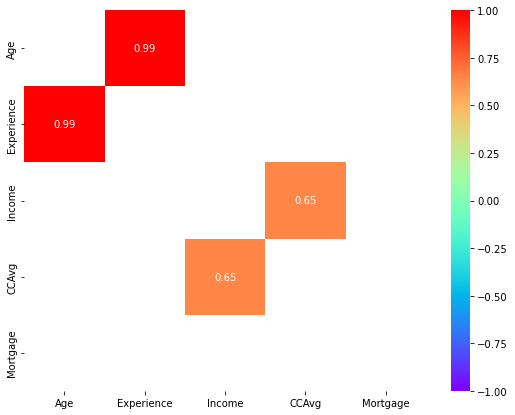

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(9, 7))

sns.heatmap(
    data=df.corr()[((df.corr() > 0.6) | (df.corr() < -0.1)) & (df.corr() != 1)],
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="rainbow",
)

plt.show()

* Age and Experience are highly correlated which is Normal.

* People with higher Income has moderate correlation with Credit Card average expense.

#### County  vs Personal_Loan Success Rate

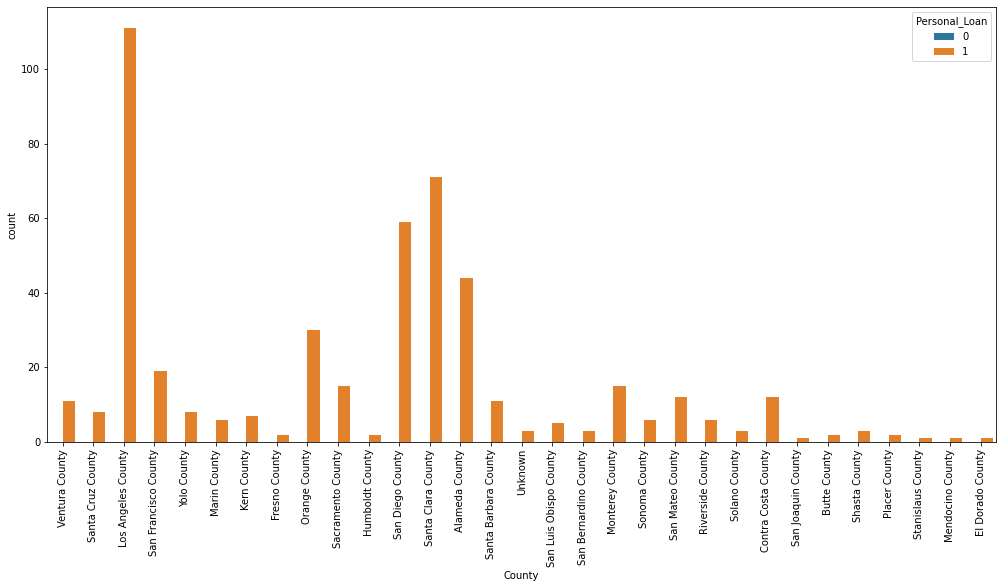

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(17, 8))
sns.countplot(data=df[df["Personal_Loan"] == 1], hue="Personal_Loan", x="County")
plt.xticks(rotation=90)
plt.show()

* Following Counties showed great Success rate in terms of Personal_loan
        
  1. Los Angeles County
  2. Santa Clara County
  3. San Diego County
  4. Alameda County
  
  
  
* Following Counties shows  0 growth in Personal_Loan

  1. Imperial County
  2. Lake County
  3. Merced County
  4. Naka County
  5. San Benito County
  6. Siskiyou County
  7. Trinity County
  8. Tuolumne County

#### Personal_Loan Success vs Categorical Features

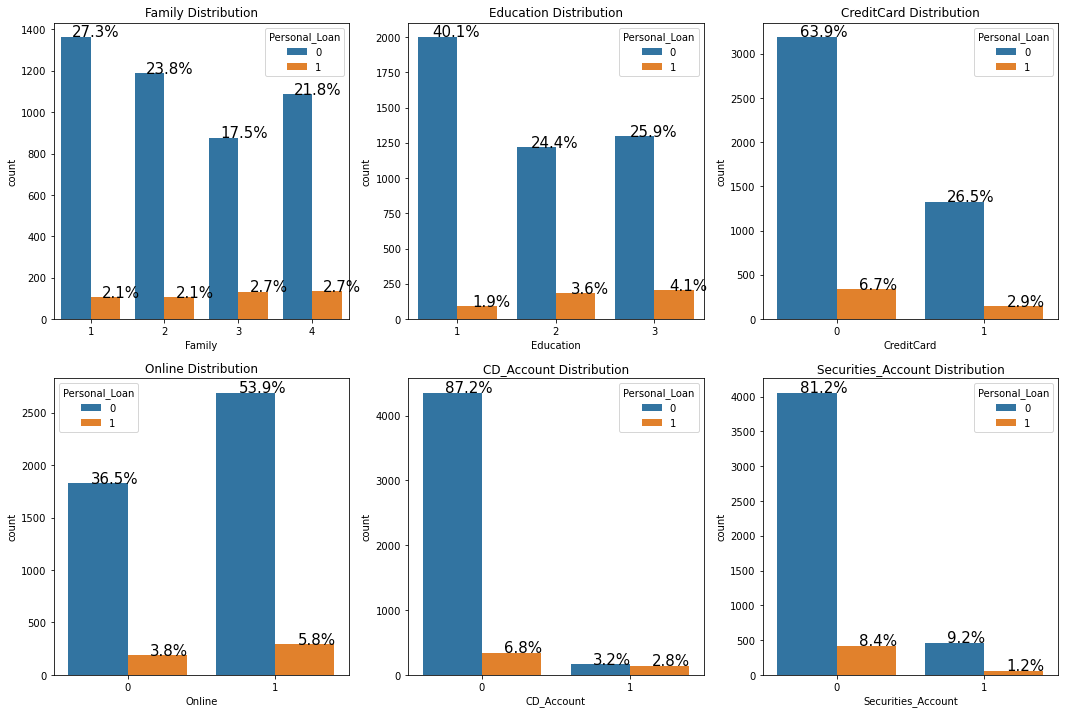

<IPython.core.display.Javascript object>

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

cat_f = [
    "Family",
    "Education",
    "CreditCard",
    "Online",
    "CD_Account",
    "Securities_Account",
]

for i in range(len(cat_f)):
    row = i // 3
    col = i % 3
    plt_ax = axes[row, col]

    sns.countplot(data=df, x=cat_f[i], hue="Personal_Loan", ax=plt_ax).set(
        title=cat_f[i] + " Distribution"
    )
    perc_cal(plt_ax, df[cat_f[i]])

plt.show()

1. Customers without any `Security_Account`, `CD_Account` and `Credit Card account` have <u>higher</u> chances of opening a Personal_Loan account.

2. `Online` banking Customers has slightly higher chances of opening Personal Account as compared to offline ones.

3. No or very little significance of `family_size` and `education` on Personal_Account

#### Removing records with "Unknown" State

In [ ]:
df.drop(df[df.State == "Unknown"].index, inplace=True)

<IPython.core.display.Javascript object>

#### Dropping City, County and State as it's not going to add too much value in model

In [ ]:
df.drop(["City", "County", "State"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Conclusion from Exploratory Data Analysis


* Missing values, Duplicate values and data types are taken care of.

* There are some Outliers but after analysis those are found to be good data. Hence kept them.

* All customers are from California and lot of Customers are from Los Angeles County.

* County and State is derived from given ZIPCodes. These are made Categorical.

* Customers without any Security_Account, CD_Account and Credit Card account have higher chances of opening a Personal_Loan account.

* Age and Experience are highly correlated which is Normal.

* People with higher Income has moderate correlation with Credit Card average expense.

* Counties like Los Angeles County,Santa Clara County,San Diego County and Alameda County showed great success rate in terms of Personal_loan.

* We need to give more attention to Imperial County,Lake County,Merced County,Naka County,San Benito County, Siskiyou County,Trinity County and Tuolumne County as there is no significant growth with Personal_loan.

* Customers without any Security_Account, CD_Account and Credit Card account have higher chances of opening a Personal_Loan account.

* Online banking Customers has slightly higher chances of opening Personal Account as compared to offline ones.


## Model Building (Logistic Regression)

#### 1. Defining Dependent & Independent Variable

In [ ]:
# Indendent Variables are X which is matrix

X = df.drop(["Personal_Loan"], axis=1)

# Dependent Variable is y which is a vector

y = df["Personal_Loan"]

<IPython.core.display.Javascript object>

In [ ]:
print(
    f" Before creating Dummies Indepedent Variable X has {X.shape[0]} and {X.shape[1]} columns"
)

 Before creating Dummies Indepedent Variable X has 4966 and 11 columns


<IPython.core.display.Javascript object>

#### 2. Creating Dummy Variables

In [ ]:
# Creating dummy variables from Independent variable X

# A list of all columns in X which has a datatype of Object or Category

dummy_col_list = list(X.select_dtypes(include="category").columns)

X = pd.get_dummies(data=X, columns=dummy_col_list, drop_first=True)

print(
    f" After creating Dummies Indepedent Variable X has {X.shape[0]} and {X.shape[1]} columns"
)

 After creating Dummies Indepedent Variable X has 4966 and 14 columns


<IPython.core.display.Javascript object>

#### 3. Split the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of Rows and Columns in train data =", X_train.shape)
print("Number of Rows and Columns in test data =", X_test.shape)

Number of Rows and Columns in train data = (3476, 14)
Number of Rows and Columns in test data = (1490, 14)


<IPython.core.display.Javascript object>

#### 4. Build a <u>Logistic Regression</u> Model

In [ ]:
Log_Reg_Model = LogisticRegression(solver="newton-cg", random_state=1)

<IPython.core.display.Javascript object>

#### 5. Fit the Logistic Regression Model

In [ ]:
Log_Reg_Model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

#### 6. Predict on test data and score

In [ ]:
y_train_pred = Log_Reg_Model.predict(X_train)

y_pred = Log_Reg_Model.predict(X_test)


train_data_score = Log_Reg_Model.score(X_train, y_train)

test_data_score = Log_Reg_Model.score(X_test, y_test)


print(f"Training Data Score = {train_data_score}")

print(f"Testing Data Score = {test_data_score}")

Training Data Score = 0.9591484464902187
Testing Data Score = 0.9563758389261745


<IPython.core.display.Javascript object>

#### Creating a Function to evaluate Model Performance on various Parameters

In [ ]:
def model_scorings(ytest, ypreds):
    acc = round(metrics.accuracy_score(ytest, ypreds), 2)
    recall = round(metrics.recall_score(ytest, ypreds), 2)
    precision = round(metrics.precision_score(ytest, ypreds), 2)
    f1 = round(metrics.f1_score(ytest, ypreds), 2)

    score_dict = {
        "Accuracy": acc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1,
        "Threshold": 0.5,
    }

    return pd.DataFrame(score_dict, index=[1])

<IPython.core.display.Javascript object>

#### Logistic Regression Model Scoring

In [ ]:
lg_reg_train_default_threshold = model_scorings(y_train, y_train_pred)
lg_reg_train_default_threshold

,Accuracy,Recall,Precision,F1,Threshold
1,0.96,0.67,0.87,0.76,0.50


<IPython.core.display.Javascript object>

In [ ]:
lg_reg_test_default_threshold = model_scorings(y_test, y_pred)
lg_reg_test_default_threshold

,Accuracy,Recall,Precision,F1,Threshold
1,0.96,0.65,0.88,0.75,0.50


<IPython.core.display.Javascript object>

#### Model evaluation criterion

Model can make wrong predictions as:

* Predicting a customer will <u>take</u> a Personal_Loan but actually he/she won't - Loss of effort (FP)

* Predicting a customer will <u>not take</u> a Personal_Loan but he/she will - Loss of business (FN)


#### Which Loss is greater ?

Loss of business will be the greater loss as the bank will be losing a potential Customer(an asset).


#### How to reduce this loss i.e need to reduce False Negatives ?
Company would want to reduce false negatives, this can be done by maximizing the Recall. <b>Greater the recall lesser the chances of false negatives.</b>

#### Confusion Matrix

In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred, labels=[1, 0])
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=labels,
        fmt="",
        cmap="summer_r",
        xticklabels=[1, 0],
        yticklabels=[1, 0],
    )
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

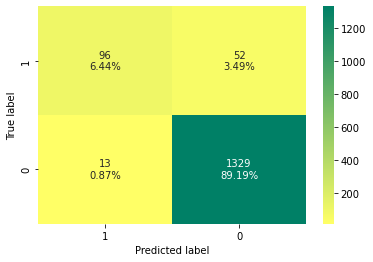

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn_with_threshold(Log_Reg_Model, X_test, y_test)

* Positives = Liability Customers <u>will buy </u> Personal Loan.

* Negatives = Liability Customers <u>will NOT  buy </u> Personal Loan.


`True Positives = 96`

`True Negatives = 1329`

`False Positives = 13`

`False Negatives = 52`



* Logistic Regression Model correctly predicted 96 positives

* Logistic Regression Model correctly predicted 1329 negatives

* Logistic Regression Model made 13 wrong predictions to be positive.

* Logistic Regression Model made 52 wrong predictions to be negatives.



#### 7. Co-efficients and Intercept weightages



#### y = 1 / (1 + e^(-x))  =  e^x / (1 + e^x)  { Logit Function to find y where x will give all the Coefficients and Intercepts}

In [ ]:
# Using above equation

[round(np.exp(x) / (1 + np.exp(x)), 2) for x in Log_Reg_Model.coef_[0]]

[0.5,
 0.51,
 0.51,
 0.54,
 0.5,
 0.43,
 0.87,
 0.83,
 0.95,
 0.96,
 0.31,
 0.97,
 0.36,
 0.32]

<IPython.core.display.Javascript object>

In [ ]:
# Plugging the co-efficients and intercept into a dataframe for a better view.

coef_df = pd.DataFrame(
    np.append(
        [round(np.exp(x) / (1 + np.exp(x)), 2) for x in Log_Reg_Model.coef_[0]],
        Log_Reg_Model.intercept_,
    ),
    index=X_test.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.sort_values(by="Coefficients", ascending=False).T

,CD_Account_1,Education_3,Education_2,Family_3,Family_4,CCAvg,Experience,Income,Age,Mortgage,Family_2,Online_1,CreditCard_1,Securities_Account_1,Intercept
Coefficients,0.97,0.96,0.95,0.87,0.83,0.54,0.51,0.51,0.50,0.50,0.43,0.36,0.32,0.31,-11.18


<IPython.core.display.Javascript object>

##### Following features have high positive importance on liablity customer taking a Personal_Loan


`Customers who already have a Certificate of Deposit`
    

`Customers who have an Advanced/Professionals education and Graduate degree`
    

`Customers who have a family size of 3 or 4`

#### Model Performance Improvement

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_perf_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Threshold": threshold,
        },
        index=[1],
    )

    return df_perf

<IPython.core.display.Javascript object>

##### Finding an Optimal Threshold Value from AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

fpr, tpr, thresholds = roc_curve(y_train, Log_Reg_Model.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1338779206277225


<IPython.core.display.Javascript object>

##### Checking Model Performance on <u>Training</u> Data using Optimal Threshold from AUC-ROC

In [ ]:
# checking model performance for this model

log_reg_model_train_perf_threshold_auc_roc = model_perf_with_threshold(
    Log_Reg_Model, X_train, y_train, threshold=optimal_threshold_auc_roc
)

print("Training performance:")

log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1,Threshold
1,0.93,0.88,0.57,0.69,0.13


<IPython.core.display.Javascript object>

##### Checking Model Performance on <u>Test</u> Data using Optimal Threshold from AUC-ROC

In [ ]:
log_reg_model_test_perf_threshold_auc_roc = model_perf_with_threshold(
    Log_Reg_Model, X_test, y_test, threshold=optimal_threshold_auc_roc
)

print("Test performance:")

log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1,Threshold
1,0.93,0.87,0.58,0.70,0.13


<IPython.core.display.Javascript object>

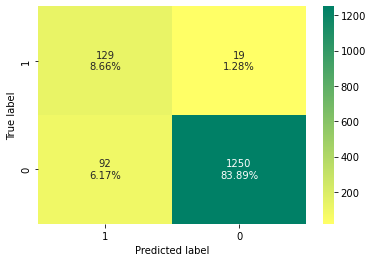

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn_with_threshold(
    Log_Reg_Model, X_test, y_test, threshold=optimal_threshold_auc_roc
)

###### Outstanding Performance Improvement when <u>Optimal Threshold</u> is used from AUC-ROC curve

* Model performance has improved significantly on training and test set.

* Model is giving a recall of 0.87 on the test set and 0.88 on training set.

* False Negative reduced to considerably to just 1.28% which helped to increase Recall

#### Let's use <u>Precision-Recall</u> curve and see if we can find a better threshold

In [ ]:
# Defining following function to plot the Precision Recall Curve


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

<IPython.core.display.Javascript object>

#### Optimal Threshold  from Precision Recall Curve for <u>Training</u> data

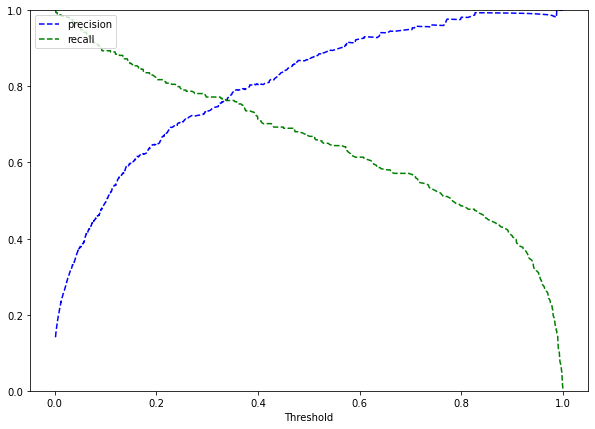

<IPython.core.display.Javascript object>

In [ ]:
y_scores = Log_Reg_Model.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()


At threshold around 0.37 we will get equal precision and recall but taking a step back and selecting value around 0.35 will provide a higher recall and a good precision.

In [ ]:
# setting the threshold
optimal_threshold_prcurve = 0.3

<IPython.core.display.Javascript object>

##### Checking Model Performance on <u>Training</u> Data using Optimal Threshold from Precision-Recall

In [ ]:
# checking model performance for this model

log_reg_model_train_perf_threshold_prec_rec = model_perf_with_threshold(
    Log_Reg_Model, X_train, y_train, threshold=optimal_threshold_prcurve
)

print("Training performance:")

log_reg_model_train_perf_threshold_prec_rec

Training performance:


,Accuracy,Recall,Precision,F1,Threshold
1,0.95,0.77,0.74,0.75,0.30


<IPython.core.display.Javascript object>

#### Optimal Threshold  from Precision Recall Curve for <u>Training</u> data

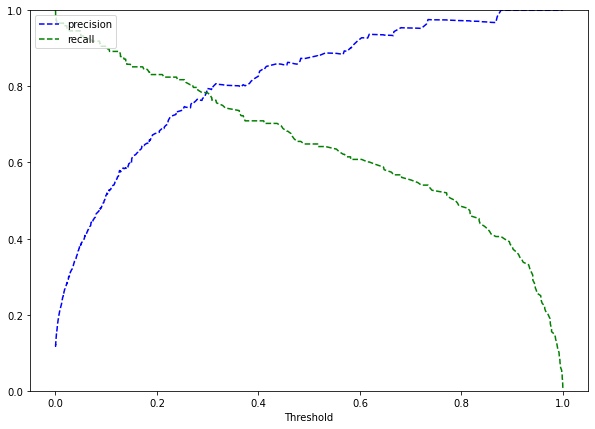

<IPython.core.display.Javascript object>

In [ ]:
y_scores = Log_Reg_Model.predict_proba(X_test)[:, 1]
prec, rec, tre = precision_recall_curve(y_test, y_scores,)
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At threshold around 0.25 we will get equal precision and recall but taking a step back and selecting value around 0.23 will provide a higher recall and a good precision.

In [ ]:
# setting the threshold
optimal_threshold_prcurve = 0.25

<IPython.core.display.Javascript object>

##### Checking Model Performance on <u>Test</u> Data using Optimal Threshold from Precision-Recall

In [ ]:
# checking model performance for this model

log_reg_model_test_perf_threshold_prec_rec = model_perf_with_threshold(
    Log_Reg_Model, X_test, y_test, threshold=optimal_threshold_prcurve
)

print("Test performance:")

log_reg_model_test_perf_threshold_prec_rec

Test performance:


,Accuracy,Recall,Precision,F1,Threshold
1,0.95,0.82,0.74,0.78,0.25


<IPython.core.display.Javascript object>

* Model Performance is good, but Recall is not as good as we got from AUC-ROC optimal threshold

* Hence my analysis will stick to the AUC-ROC threshold value of 0.13

### Comparison of Model Performance on various matrices

In [ ]:
# pd.DataFrame(
# lg_reg_test_default_threshold
# log_reg_model_test_perf_threshold_auc_roc
# log_reg_model_test_perf_threshold_prec_rec
# )

# training performance comparison

models_train_comp_df = pd.concat(
    [
        lg_reg_test_default_threshold.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_prec_rec.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "LR-Default (sklearn)",
    "LR-0.13 Threshold (AUC-ROC)",
    "LR-0.25 Threshold (Prec-Recall)",
]

print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


,LR-Default (sklearn),LR-0.13 Threshold (AUC-ROC),LR-0.25 Threshold (Prec-Recall)
Accuracy,0.96,0.93,0.95
Recall,0.65,0.87,0.82
Precision,0.88,0.58,0.74
F1,0.75,0.70,0.78
Threshold,0.50,0.13,0.25


<IPython.core.display.Javascript object>

### Logistic Regression Model Conclusion:

1. By changing the threshold of the logistic regression model we were able to see a significant improvement in the model performance.


2. Model achieved best performance after finding Optimal Threshold from AUC-ROC Curve.


3. The model achieved a recall of 0.88 on the training set and 0.87 on test set with threshold set at 0.13.


4. Model Performace on $Training$ and $Test$ are very similar which says the Model is <b> neither Underfit nor Overfit </b>.


5. False Negative reduced to considerably to just 1.28% which helped to increase Recall and save Bank from loosing potential Customers for Personal_Loan.


6. Customers who already have a Certificate of Deposit have positive influence on going for a Personal_Loan.


7. Customers who have an Advanced/Professionals education and Graduate degree folks also have positive influence on going for a Personal_Loan.


8. Customers who have a family size of 3 or 4 have positive influence on going for a Personal_Loan.



## Model Building (Decision Tree)

#### Building a Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.


* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.


* In this case, we can pass a dictionary {0:0.10,1:0.90} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.


* class_weight is a hyperparameter for the decision tree classifier.

In [ ]:
dtree_clf = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.10, 1: 0.90}, random_state=1
)

<IPython.core.display.Javascript object>

In [ ]:
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

#### Below function will plot a Confusion Matrix

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred, labels=[1, 0])
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=labels,
        fmt="",
        cmap="summer_r",
        xticklabels=[1, 0],
        yticklabels=[1, 0],
    )
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Creating a function to calculate Decision Tree Model Scoring

In [ ]:
def dtree_model_scorings(ytest, ypreds, model_type):
    acc = round(metrics.accuracy_score(ytest, ypreds), 2)
    recall = round(metrics.recall_score(ytest, ypreds), 2)
    precision = round(metrics.precision_score(ytest, ypreds), 2)
    f1 = round(metrics.f1_score(ytest, ypreds), 2)

    score_dict = {
        "Accuracy": acc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1,
        "Decision Tree": model_type,
    }

    return pd.DataFrame(score_dict, index=[1])

<IPython.core.display.Javascript object>

#### Checking model performance on <u>training</u> set

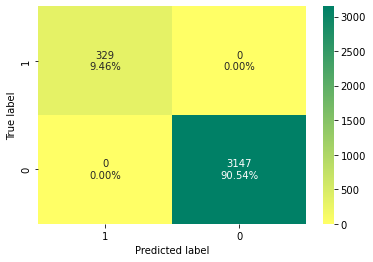

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(dtree_clf, X_train, y_train)

In [ ]:
dtree_model_scorings(y_train, dtree_clf.predict(X_train), "Default on Train")

,Accuracy,Recall,Precision,F1,Decision Tree
1,1.00,1.00,1.00,1.00,Default on Train


<IPython.core.display.Javascript object>

#### Checking model performance on <u>test</u> set

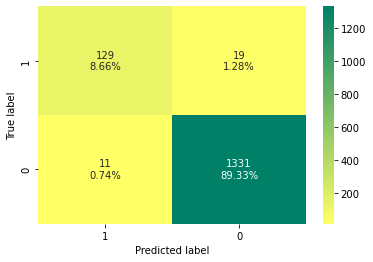

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(dtree_clf, X_test, y_test)

In [ ]:
dtree_model_scorings(y_test, dtree_clf.predict(X_test), "Default on Test")

,Accuracy,Recall,Precision,F1,Decision Tree
1,0.98,0.87,0.92,0.90,Default on Test


<IPython.core.display.Javascript object>

* Model is able to perfectly classify all the data points on the training set (which is normal for default Decision Tree).


* 0 errors on the training set, each sample has been classified correctly.


* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.


* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.


* The default Model has also performed well on the Test data.


* Only 0.74%(False Positives) Type I error and only 1.28%(False Negatives) Type II error 


* Recall score is 0.87 which is pretty good to minimize the False Negatives.

#### Visualizing the Decision Tree (Default Decision Tree Model)

In [ ]:
# Defining below function to visualize a decision tree using model


def view_my_tree(model, features):
    plt.figure(figsize=(12, 10))
    out = tree.plot_tree(
        model,
        feature_names=features,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # below code will add arrows to the decision tree split if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

<IPython.core.display.Javascript object>

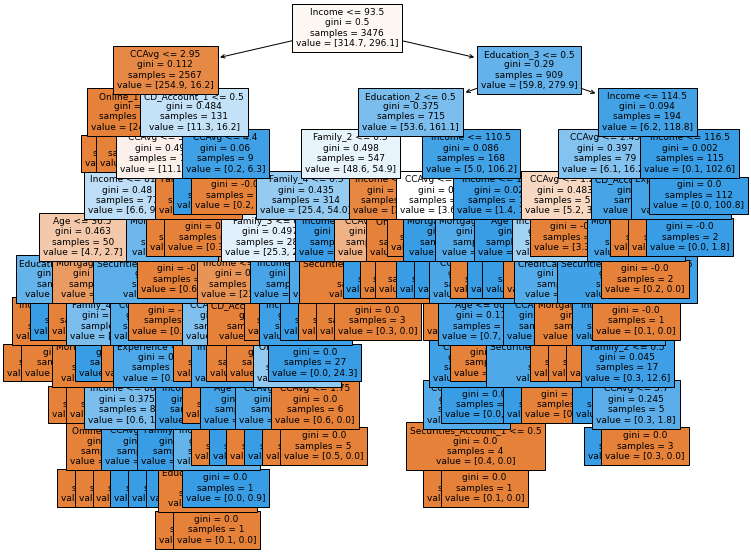

<IPython.core.display.Javascript object>

In [ ]:
view_my_tree(dtree_clf, X.columns)

#### Feature Importance

In [ ]:
# Defining below function to view and plot the importance of each features


def dtree_feature_importance(model, features):
    feature_imp_df = pd.DataFrame(
        dtree_clf.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)

    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 7))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="green", align="center")
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

    return feature_imp_df.T

<IPython.core.display.Javascript object>

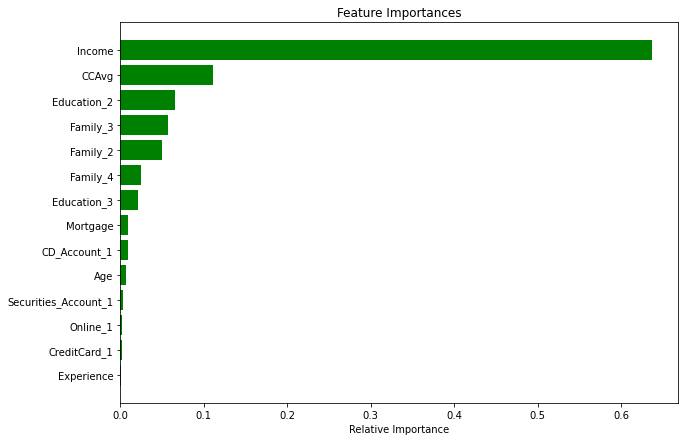

,Income,CCAvg,Education_2,Family_3,Family_2,Family_4,Education_3,Mortgage,CD_Account_1,Age,Securities_Account_1,Online_1,CreditCard_1,Experience
Imp,0.64,0.11,0.07,0.06,0.05,0.02,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

In [ ]:
dtree_features = dtree_feature_importance(model=dtree_clf, features=X_train.columns)

dtree_features

1. Income is the most important feature as per the Decision Tree Model followed by Credit Card Average

#### Hyper Parameter Tuning using GridSearchCV

* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.


* It is an exhaustive search that is performed on a the specific parameter values of a model.


* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1)

<IPython.core.display.Javascript object>

#### Grid Search CV algorithm creates a model with following best fit parameter - 

* class_weight={0: 0.15, 1: 0.85}

* max_depth=5

* min_impurity_decrease=0.01
    

#### Lets checkout this model (estimator) performance on training and test data

#### Model performance on <u>Training</u> data

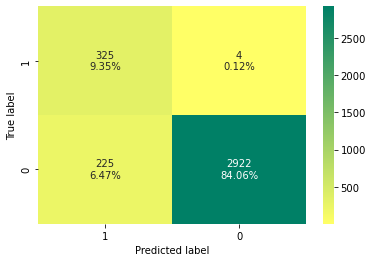

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
dtree_model_scorings(y_train, estimator.predict(X_train), "GridSearchCV Estimator")

,Accuracy,Recall,Precision,F1,Decision Tree
1,0.93,0.99,0.59,0.74,GridSearchCV Estimator


<IPython.core.display.Javascript object>

#### Model performance on <u>Test</u> data

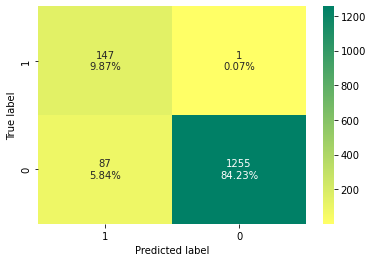

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
dtree_model_scorings(y_test, estimator.predict(X_test), "GridSearchCV Estimator")

,Accuracy,Recall,Precision,F1,Decision Tree
1,0.94,0.99,0.63,0.77,GridSearchCV Estimator


<IPython.core.display.Javascript object>

* Hyper Parameter Tuning worked perfort using GridSearchCV algorithm.

* Estimator returned a 0.99 Recall on both training and test data. This is absolutely great.

* False Negatives (Type II) error is hugely decreased to just 0.07%.

#### Visualizing the Decision Tree (With Hyper Parameter Tuninng using GridSearchCV)

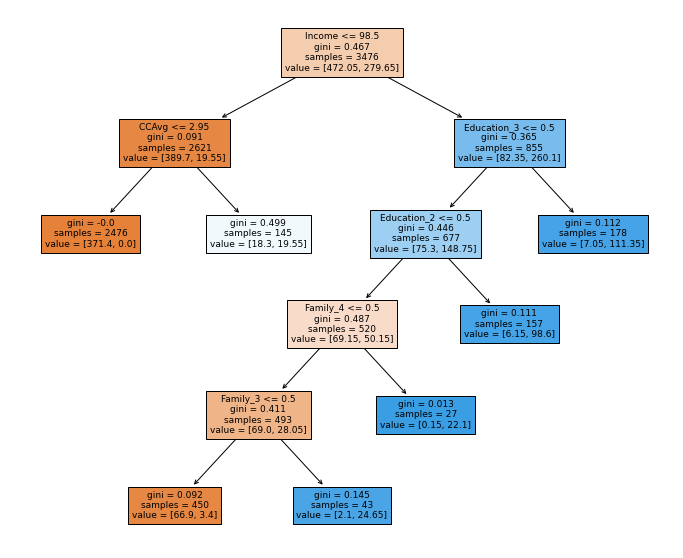

<IPython.core.display.Javascript object>

In [ ]:
view_my_tree(estimator, X.columns)

#### Feature Importance

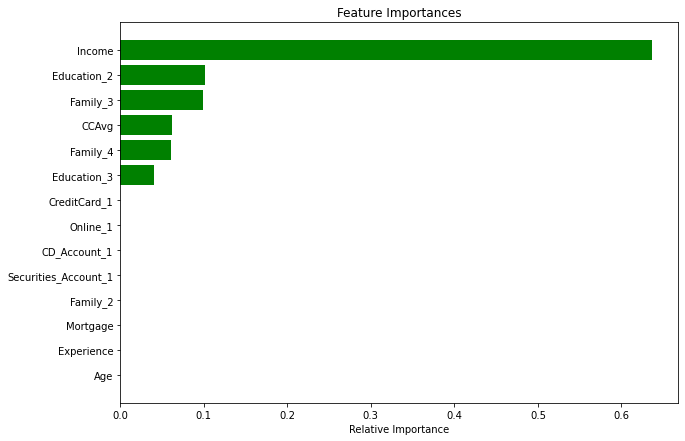

,Income,CCAvg,Education_2,Family_3,Family_2,Family_4,Education_3,Mortgage,CD_Account_1,Age,Securities_Account_1,Online_1,CreditCard_1,Experience
Imp,0.64,0.11,0.07,0.06,0.05,0.02,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

In [ ]:
dtree_features_gridsearch = dtree_feature_importance(
    model=estimator, features=X_train.columns
)
dtree_features_gridsearch

1. Income is the most important feature as per the Decision Tree Model found from Hyper Parameter tuning (Grid Search CV algorithm) followed by Graduate Customers and Customers who have 3 member family

### Cost Complexity Pruning

1. Cost complexity pruning provides another option to control the size of a tree. 

2. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. 

3. Greater values of ccp_alpha increase the number of nodes pruned. As more nodes get pruned, the tree simpler and impurity increases.

4. Lets find the effect of ccp_alpha on regularizing the trees and choose a ccp_alpha based on validation scores.


5. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process.


In [ ]:
# Creating a Decision Tree Classifier Model clf
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# path will show how the Total Impurity of the tree changes with the change in
# Cost Complexity Pruning (ccp_alpha)
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Storing the ccp_alpha and impurity values in variables
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [ ]:
# A table showing the change in cost complexity pruning and Impurity changes
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00,-0.00
1,0.00,-0.00
2,0.00,-0.00
3,0.00,-0.00
4,0.00,-0.00
5,0.00,-0.00
6,0.00,-0.00
7,0.00,-0.00
8,0.00,-0.00
9,0.00,-0.00


<IPython.core.display.Javascript object>

#### Plotting the change of Impurity with Cost Complexity Alpha

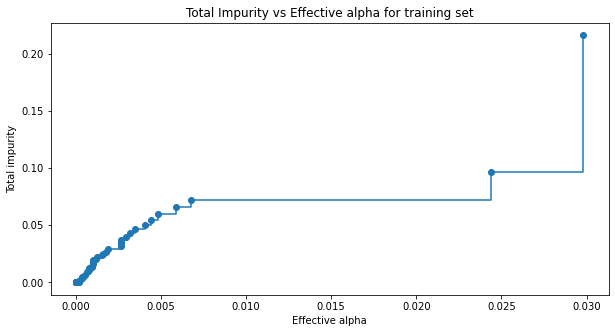

<IPython.core.display.Javascript object>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity")
ax.set_title("Total Impurity vs Effective alpha for training set")
plt.show()

##### Creating Classifier Models with different values of Alpha (Not considering the last value in ccp_alpha as it prunes the whole tree)

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)

    clfs.append(clf)


print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2512984398420927


<IPython.core.display.Javascript object>

#### Lets find out how the Node count and Tree Depth Changes with CCP Alpha

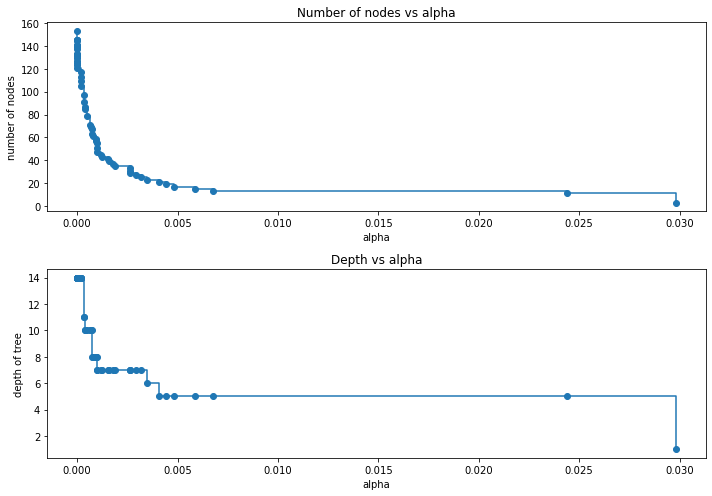

<IPython.core.display.Javascript object>

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Lets calculate how Recalls on the Classfication Models (clfs) over Training Set

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

#### Lets calculate how Recalls on the Classfication Models (clfs) over Test Set

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

#### Plotting these Recalls of Training and Test together against CCP_Alpha

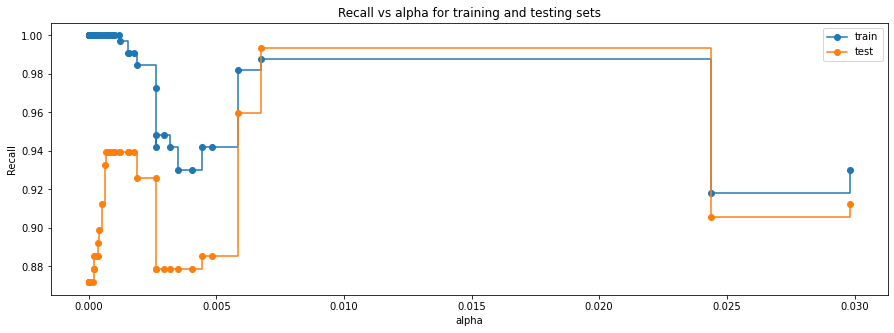

<IPython.core.display.Javascript object>

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

We will consider a Recall value which is high and keeping the impurity low at the same time. It looks we attain a recall of 0.99 and the impurity is 0.007.

Hence taking ccp_alpha = 0.006 ~ 0.007

#### Creating the Best Fit Model with ccp_alpha as 0.006 (from above analysis on Recall)

In [ ]:
# creating the model where we get highest train and test recall

index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006747585910649469,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

#### Training the Best Fit Model

In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006747585910649469,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### Plotting a Confusion Matrix (on Training Data)

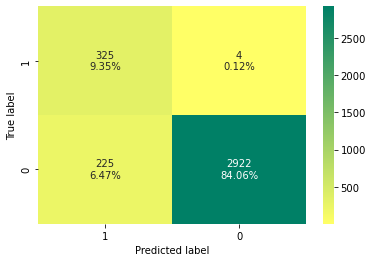

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### ModelScroing (On Training Data)

In [ ]:
dtree_model_scorings(y_train, best_model.predict(X_train), "Cost Complexity (Training)")

,Accuracy,Recall,Precision,F1,Decision Tree
1,0.93,0.99,0.59,0.74,Cost Complexity (Training)


<IPython.core.display.Javascript object>

#### Plotting a Confusion Matrix (on Testing Data)

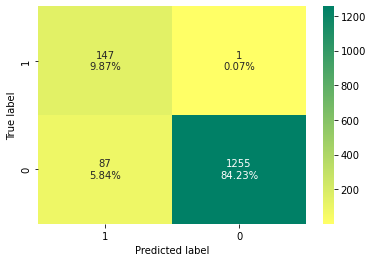

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

#### ModelScroing (On Testing Data)

In [ ]:
dtree_model_scorings(y_test, best_model.predict(X_test), "Cost Complexity (Testing)")

,Accuracy,Recall,Precision,F1,Decision Tree
1,0.94,0.99,0.63,0.77,Cost Complexity (Testing)


<IPython.core.display.Javascript object>

#### Viewing the Decision Tree build after Cost Complexit Pruning

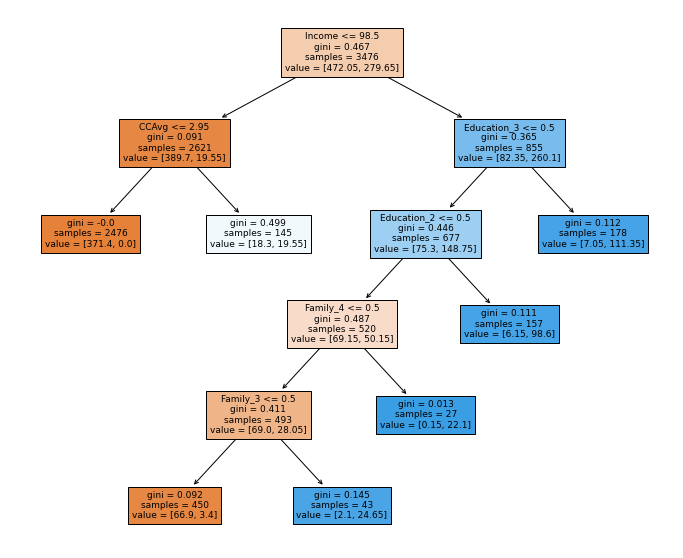

<IPython.core.display.Javascript object>

In [ ]:
view_my_tree(best_model, X.columns)

#### Feature Importance of the Tree (after CCP_alpha adjustment)

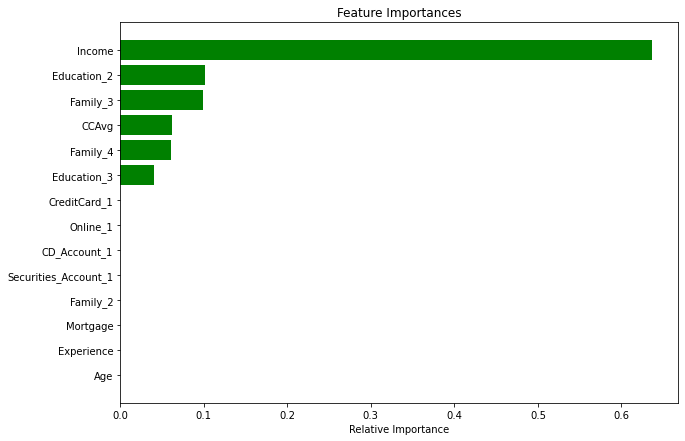

,Income,CCAvg,Education_2,Family_3,Family_2,Family_4,Education_3,Mortgage,CD_Account_1,Age,Securities_Account_1,Online_1,CreditCard_1,Experience
Imp,0.64,0.11,0.07,0.06,0.05,0.02,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

In [ ]:
dtree_features_ccp = dtree_feature_importance(
    model=best_model, features=X_train.columns
)
dtree_features_ccp

Income is the most important feature as per the Decision Tree Model found from <b>Cost Complexity Pruning</b> followed by Graduate Customers and Customers who have 3 member family

#### Comparing all Decision Tree Scorings

In [ ]:
def_scoring = dtree_model_scorings(y_test, dtree_clf.predict(X_test), "Default on Test")
grid_scoring = dtree_model_scorings(
    y_test, estimator.predict(X_test), "GridSearchCV Estimator Test"
)
ccp_scoring = dtree_model_scorings(
    y_test, best_model.predict(X_test), "Cost Complexity (Test)"
)

dtree_models_comp_df = pd.concat(
    [def_scoring.T[:-1], grid_scoring.T[:-1], ccp_scoring.T[:-1],], axis=1,
)
dtree_models_comp_df.columns = [
    "Default on Test",
    "GridSearchCV Estimator Test",
    "Cost Complexity (Test)",
]

print("Decision Tree Test performance comparison:")

dtree_models_comp_df

Decision Tree Test performance comparison:


,Default on Test,GridSearchCV Estimator Test,Cost Complexity (Test)
Accuracy,0.98,0.94,0.94
Recall,0.87,0.99,0.99
Precision,0.92,0.63,0.63
F1,0.90,0.77,0.77


<IPython.core.display.Javascript object>

### Decision Tree Models Conclusion:

1. We've compared 3 different ways for a Decision Tree Model - 

    a. Using default values in Decision Tree Classification algorithm
    b. Using GridSearchCV Hyper Parameter Tuning of Decision Tree
    c. Using Post Pruning Cost Complexity method of Decision Tree.
    

2. In our project to predict whether a Customer will take a Personal Loan, the Bank will suffer a business loss if we predict someone will <u>not</u> take a Personal Loan but actually that person <u>will take</u>.
Positive Class --> Customer wil take Loan
Negative Class --> Customer will not take Loan

Hence Type II error or predicting False Negatives will be expensive. Hence we have to reduce the False Negatives. 
Increasing the Recall Score means decrease in False Negatives. So, our main scoring target will be to <b>increase Recall</b>


3. GridSearchCV Hyper paramter tuning process and Cost complexity alpha post pruning process resulted in same scorings of Recall. Hence both the Method can be followed.


4. We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.


5. Overfitting is highly reduced when we followed hyper parameter tuning or pruning techniques.


6. Income is the most important feature as per the Decision Tree Model followed by Graduate Customers and Customers who have 3 member family.



### Recommendations:

* The Dataset is almost based on California. So AllLife need to scout outside California and expand their Business to other States.


* The Bank also need to give more attention to Imperial County,Lake County,Merced County,Naka County,San Benito County, Siskiyou County,Trinity County and Tuolumne County as there is no significant growth with Personal_loan.


* Decision trees doesn't require to much data preparation or handling of outliers like logistic regression. They are easy to understand. Decision tress can easily overfit , so we have to be careful using decision tree.


* Income of a Customer plays a significant role in this prediction model. Customers having higher Income have more chances to buy a Personal Loan.


* Graduate and 3-member family customers also have fair chances to buy a Personal_Loan.


* Hence we might need to <b>segmentize Customer</b> based on various Profiles - 

    a. <b>Premium Customers</b>:
    Higher income,Advanced/Graduate level education, 3 /4 Family members,high spending
    
    b. <b>Mid-range Customers</b>:
    Medium income group,Graduate level education.3/4Family members,medium spending
    
    c. <b>Standard Customers</b>:
    Lower income group,undergrads ,3/4Family Member,low spending
            

* AllLife Bank can target premium customers first, by providing them with a personal relationship managers who can address there concerns and can pursue them to buy loan from the bank with completive interest rates.


* Prequalifying for Loan can also attract more customers.


* May be some attractive short-term Offers to Mid-Range Customers can increase chances of taking a Personal Loan.
            